# Importing of basic libraries for Module.


In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import operator
import sys
import nltk
import seaborn as sns
from operator import itemgetter
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
stm = nltk.stem.SnowballStemmer("english")



# DATA EXPLORATION

# Extracting package data from the .json files.

In [3]:
raw_data = pd.read_json('train.json')
raw_data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
cuisine_list = pd.DataFrame(raw_data['cuisine'])
cuisine_list

,cuisine
0,greek
1,southern_us
2,filipino
3,indian
4,indian
5,jamaican
6,spanish
7,italian
8,mexican
9,italian


In [5]:
ingredient_list = []

for i in range(len(raw_data["ingredients"])):
    for j in range(len(raw_data["ingredients"][i])):
        if raw_data["ingredients"][i][j] not in ingredient_list:
            ingredient_list.append(raw_data["ingredients"][i][j])
len(ingredient_list)

6714

# Organisation of data into distinct dataframes, importing Matplotlib for graphical visualisations.


In [6]:
with open('train.json', 'r') as f:
    data = json.load(f)
raw_data = pd.DataFrame(data)
sLength = len(raw_data['ingredients'])

%matplotlib inline
import matplotlib.pyplot as plt
train = pd.read_json('train.json')
train.head()
print("Dataframe Assembled.")

Dataframe Assembled.


In [7]:
raw_data['ingredients_text'] = raw_data['ingredients'].apply(lambda x: ', '.join(x))
raw_data['num_ingredients'] = raw_data['ingredients'].apply(lambda x: len(x))
raw_ingredients = [ingredient for ingredients in raw_data.ingredients.values for ingredient in ingredients]
raw_data.head()
# Parsing new columns from our ingredients to get ingredient count without added symbols that would throw off our code

,cuisine,id,ingredients,ingredients_text,num_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce, black olives, grape tomatoes,...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour, ground pepper, salt, tomatoes, gr...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs, pepper, salt, mayonaise, cooking oil, gr...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]","water, vegetable oil, wheat, salt",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper, shallots, cornflour, cayenne pep...",20


# Obeserving relevant recipe counts comparative to number of ingredients, telling us number of recipes having a certain number of ingredients.

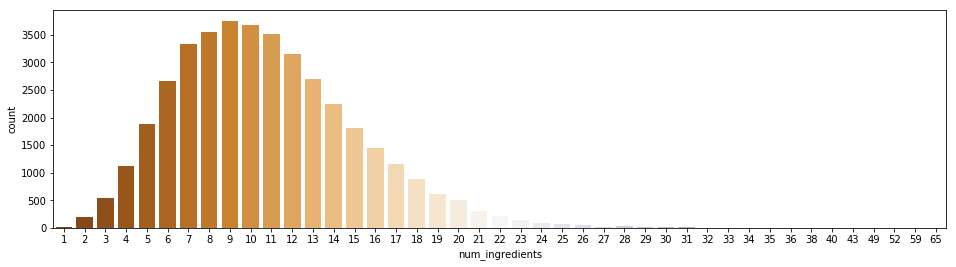

In [8]:
plt.figure(figsize=(16,4))
sns.countplot(x='num_ingredients',palette="PuOr", data=raw_data)



# Interpretation of the hit-rate as compared to the various cuisine name classifications; 

# Boxplots yielding the corresponding min/max,median mean and scattered datapoints for the cuisines as well as that of the number of ingredients.


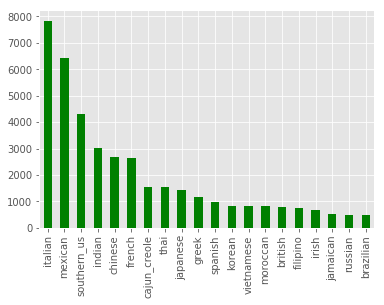

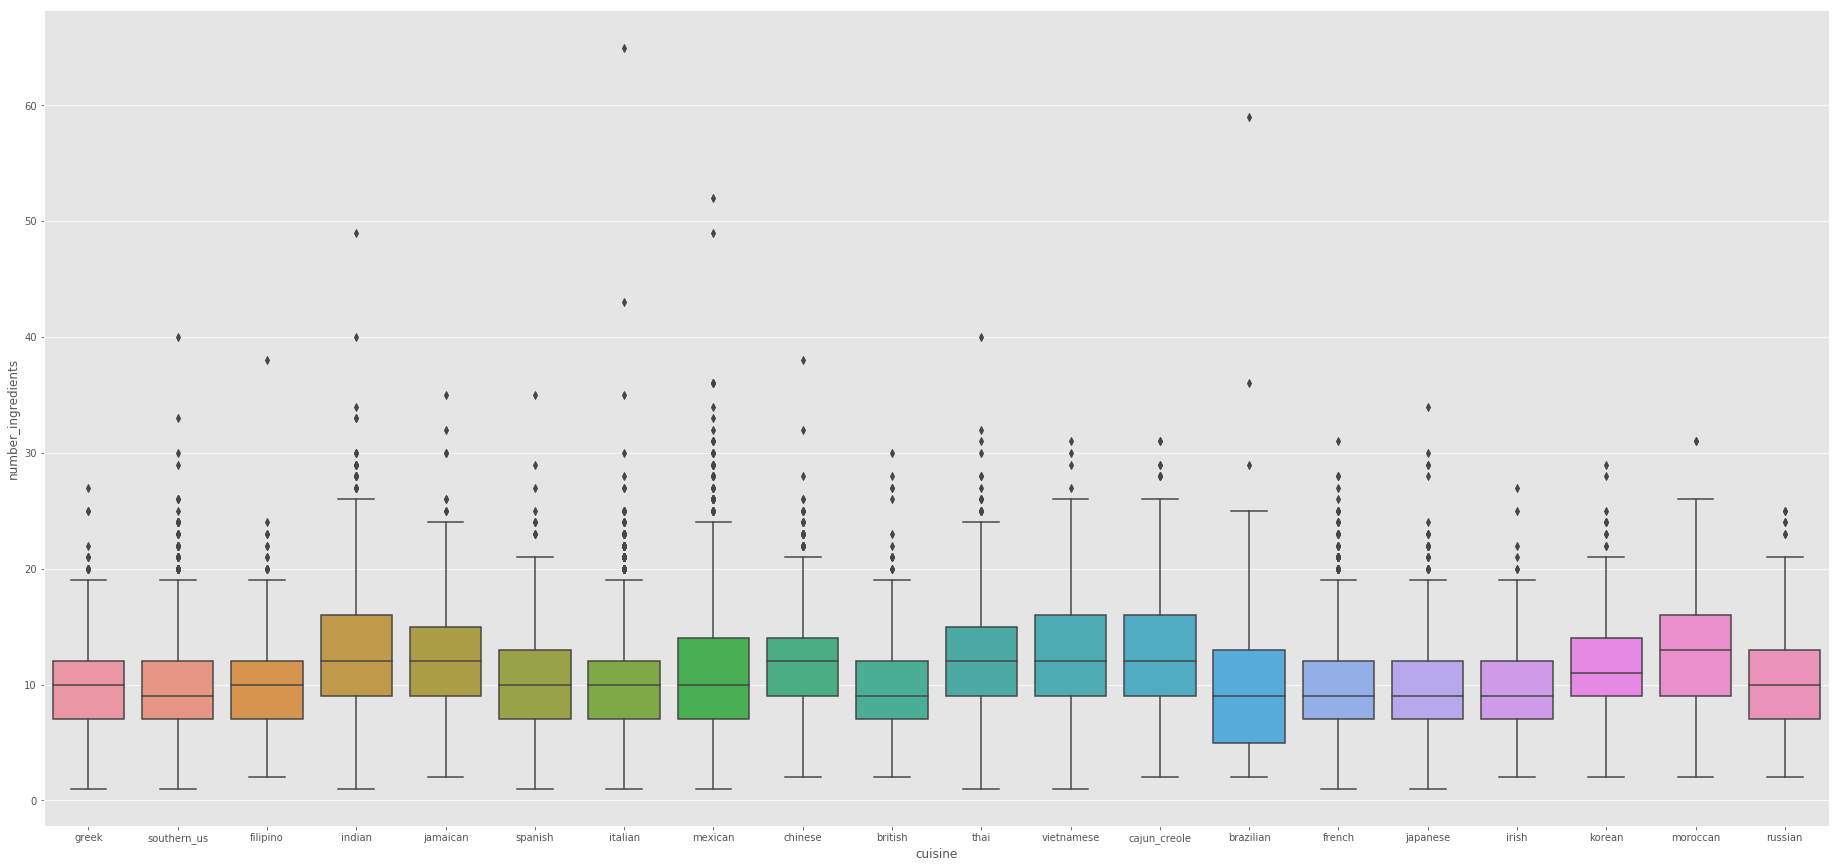

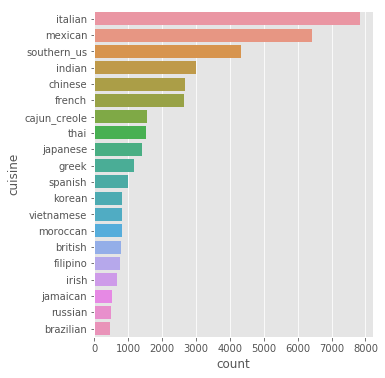

In [9]:
plt.style.use('ggplot')
train['cuisine'].value_counts().plot(kind='bar', color = 'g')



f, ax = plt.subplots(figsize=(32,15))
sns.boxplot(x='cuisine',
            y='number_ingredients',
            data= (pd.concat([train.cuisine,train.ingredients.map(lambda l: len(l))], axis=1)
                    .rename(columns={'ingredients':'number_ingredients'}))
            )

f, ax = plt.subplots(figsize=(5,6))
sns.countplot(y = 'cuisine', 
                   data = train,
                  order = train.cuisine.value_counts(ascending=False).index)

## Lists the top/most popular/occurance of 8 ingredients for the various cuisines derived from the dataset.

In [10]:
#Storage of collections of data for better sorting 

counters = {}
for cuisine in train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (train['cuisine'] == cuisine)
    for ingredients in train[indices]['ingredients']:
        counters[cuisine].update(ingredients)
        
top8_ingredients = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(8)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 9)])
top8_ingredients

#Listing the top/most popular/occurance of 8 ingredients for the various cuisines derived from the dataset.


,top1,top2,top3,top4,top5,top6,top7,top8
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions


In [11]:
raw_data['all_ingredients'] = raw_data['ingredients'].map(";".join)
raw_data.head()

,cuisine,id,ingredients,ingredients_text,num_ingredients,all_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce, black olives, grape tomatoes,...",9,romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour, ground pepper, salt, tomatoes, gr...",11,plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs, pepper, salt, mayonaise, cooking oil, gr...",12,eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]","water, vegetable oil, wheat, salt",4,water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper, shallots, cornflour, cayenne pep...",20,black pepper;shallots;cornflour;cayenne pepper...


In [12]:
raw_data['all_ingredients'].str.contains('butter')

0        False
1        False
2         True
3        False
4         True
5         True
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14        True
15       False
16       False
17       False
18       False
19       False
20        True
21       False
22       False
23       False
24       False
25       False
26       False
27        True
28       False
29       False
         ...  
39744    False
39745    False
39746    False
39747     True
39748    False
39749    False
39750     True
39751    False
39752     True
39753    False
39754    False
39755    False
39756    False
39757    False
39758    False
39759    False
39760     True
39761    False
39762    False
39763    False
39764    False
39765    False
39766    False
39767     True
39768    False
39769     True
39770    False
39771     True
39772    False
39773    False
Name: all_ingredients, Length: 39774, dtype: bool

# Utilisation of an example 'Butter' matching to different cuisine/Recipe ingredient composition.

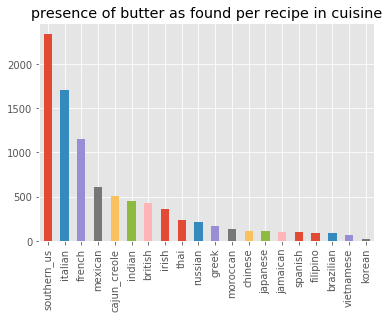

In [13]:
indices = raw_data['all_ingredients'].str.contains('butter')
raw_data[indices]['cuisine'].value_counts().plot(kind='bar',
        title = 'presence of butter as found per recipe in cuisine')
# This allows us to see which countries uses the most butter in their recipes, in this case Southern US. 

## However, due to there being many different/overrepresentation of southern US recipes, we decided to divide it "Southern US" and the other cuisines by their corresponding numerical representations to obtain a more objective presentation.

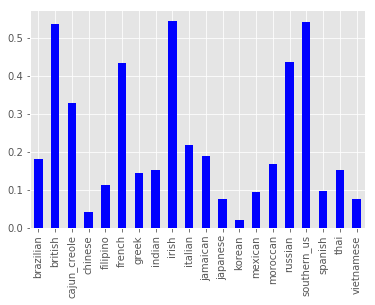

In [14]:
freq = (raw_data[indices]['cuisine'].value_counts() / raw_data['cuisine'].value_counts())
freq.plot(kind='bar', color = 'b')


# Repeating the previous step for the identified top 8 specific ingredients:

In [15]:
specific = np.unique(top8_ingredients.values.ravel())
specific

array(['all-purpose flour', 'baking powder', 'baking soda', 'butter',
       'cachaca', 'cajun seasoning', 'carrots', 'cayenne pepper',
       'chili powder', 'coconut milk', 'corn starch', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'garam masala', 'garlic', 'garlic cloves',
       'grated parmesan cheese', 'green bell pepper', 'green onions',
       'ground allspice', 'ground black pepper', 'ground cinnamon',
       'ground cumin', 'ground ginger', 'ground turmeric',
       'jalapeno chilies', 'large eggs', 'lime', 'milk', 'mirin', 'oil',
       'olive oil', 'onions', 'pepper', 'potatoes', 'rice vinegar',
       'sake', 'salt', 'scallions', 'sesame oil', 'sesame seeds',
       'shallots', 'sour cream', 'soy sauce', 'sugar', 'tomatoes',
       'unsalted butter', 'vegetable oil', 'water'], dtype=object)

# Plotting the data on a 8 by 7 axis

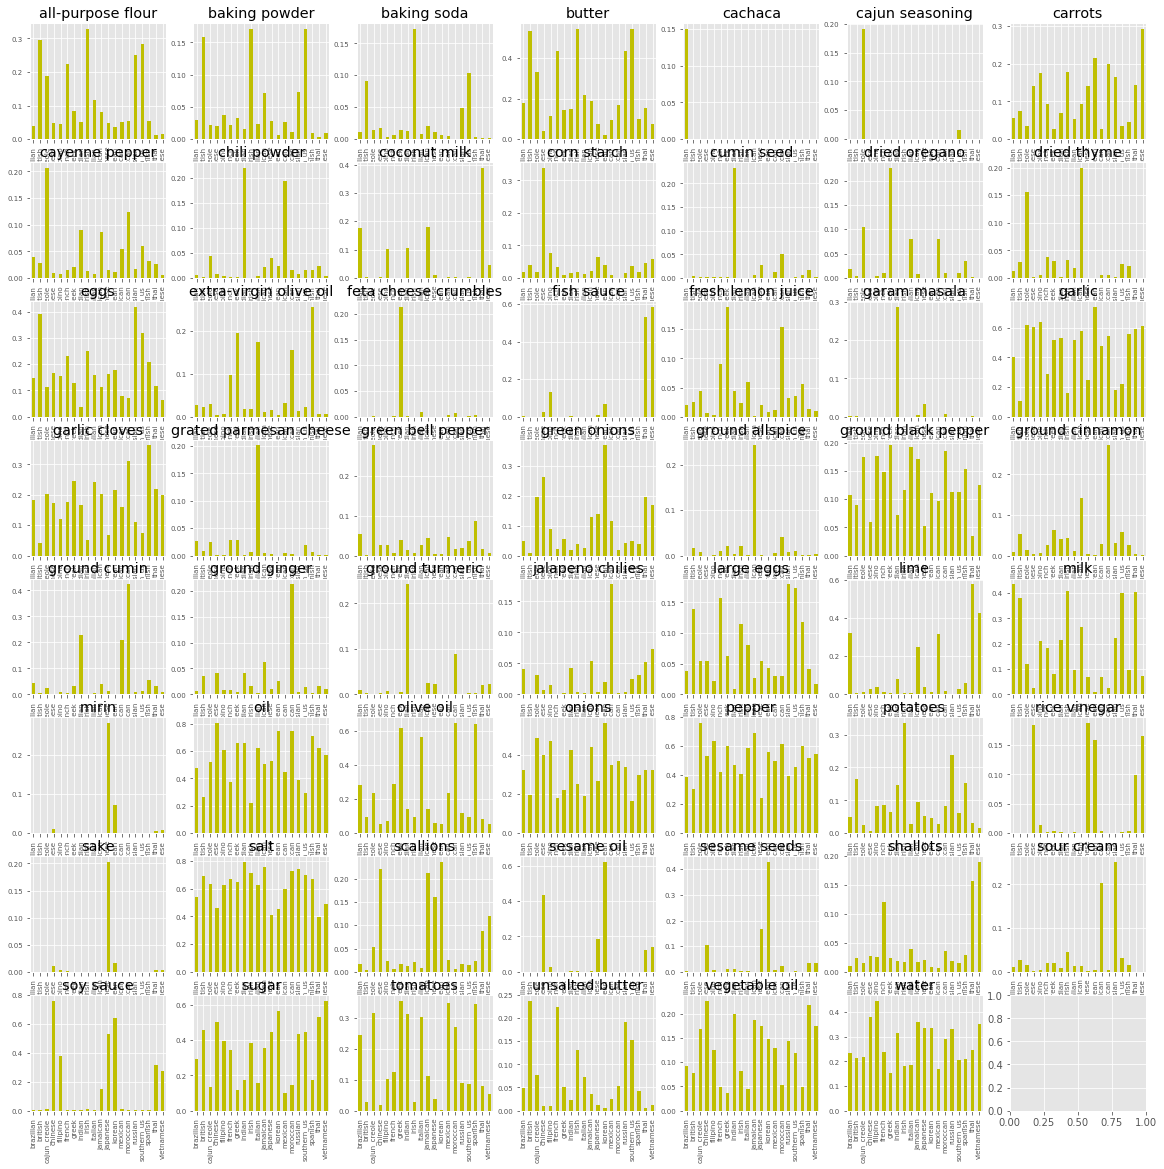

In [18]:
fig, axes = plt.subplots(8, 7, figsize=(20, 20))
for ingredient, ax_index in zip(specific, range(64)):
    indices = raw_data['all_ingredients'].str.contains(ingredient)
    freq = (raw_data[indices]['cuisine'].value_counts() / raw_data['cuisine'].value_counts())
    freq.plot(kind='bar', color = 'y', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

As we can see from this diagrams, there are certain ingredients that are extremely specific to a few cuisines. a few such examples would be sake and mirin. This allows us to conclude a way of classifying/pairing a recipe to a cuisine based on its unique ingredients.

# Training a logistic regression module:

In [19]:
count = CountVectorizer()
X = count.fit_transform(raw_data['all_ingredients'].values)
X.shape

(39774, 3010)

The count vectorizer builds a matrix with 1s and 0s. This would be before machine learning comes in, where we examine the shape of the matrix.

In [20]:
print(list(count.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

The feature assigns a number to each ingredient depending on wether they are present or not by creating a specific column for every ingredient. 1 = present and 0 = absent.
We convert names to unique identifiable integers to be processed by the machine for machining purposes.

In [21]:
encoded = LabelEncoder()
y = encoded.fit_transform(raw_data.cuisine)
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

converting the dtype of the cuisines to integers

In [22]:
encoded.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

# Training the logistic regression module: (Machine Learning)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
log_reg.score(X_test, y_test)

0.7868007542426148

We can see that our module generates significantly accurate results of up to 79%. However, we feel that is not good enough and hence we follow it up with a confusion matrix to push the testing of the prediction of our module even further.

# Inspecting the results of the classification using the confusion matrix (Machine Learning) :

Text(0.5, 64.59999999999997, 'Predicted label')

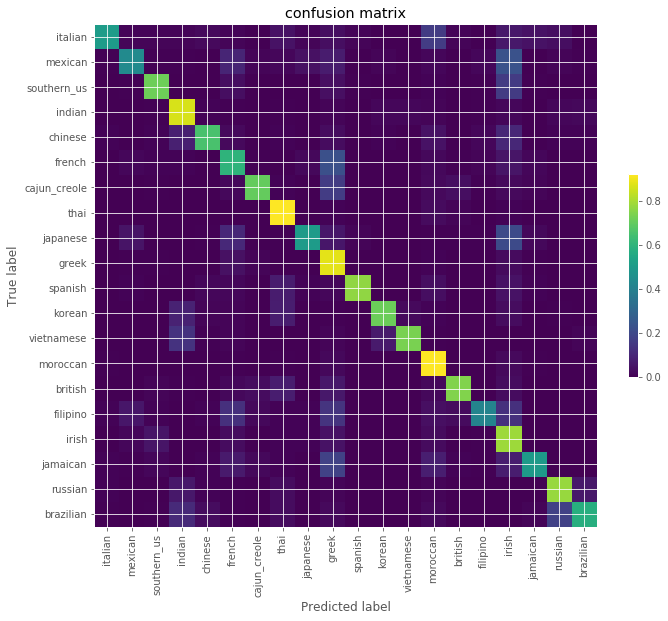

In [26]:
plt.figure(figsize=(10, 10))

confucious = confusion_matrix(y_test, log_reg.predict(X_test))
confucious_normalized = confucious.astype('float') / confucious.sum(axis=1)[:, np.newaxis]

plt.imshow(confucious_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = raw_data['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

As we can see most cuisines are predicted really well such as 'moroccan', 'greek', 'thai' and 'indian" as follows. However there are a handful of cuisines that are more commonly 
predicted wrongly by the confusion matrix such as 'greek' & 'irish'.

In [27]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.75      0.51      0.61        86
     mexican       0.60      0.44      0.51       167
 southern_us       0.77      0.72      0.75       333
      indian       0.81      0.87      0.84       542
     chinese       0.75      0.66      0.70       135
      french       0.64      0.60      0.62       575
cajun_creole       0.80      0.71      0.75       214
        thai       0.85      0.92      0.89       602
    japanese       0.66      0.51      0.57       140
       greek       0.79      0.89      0.83      1511
     spanish       0.91      0.77      0.83       113
      korean       0.87      0.72      0.78       297
  vietnamese       0.86      0.74      0.79       146
    moroccan       0.89      0.92      0.91      1249
     british       0.81      0.75      0.78       164
    filipino       0.62      0.42      0.50       108
       irish       0.70      0.79      0.74       895
    jamaican       0.69    

We can also view the results this way where it tells us the different percentages of our prediction which includes the 
confidence of the function of the correct cuisine or not.

# Conclusion
As seen from our code, we simplified a raw set of data from kaggle, by breaking it down into sub components, mostly using comparisons and uniqueness. We then carried on with training a model to help us predict which turned out to be pretty ideal for the prediction rate. But to counter check to it, we also added in a few plots to help us analyse the accuracy of the data. We are unable to ensure a better accuracy rate but at least we know the data that we get from the machine can be analysed before making our decisions whether to employ the data.